In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
documents = pd.read_csv('../data/IMDB Dataset.csv')

In [3]:
documents.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [4]:
documents.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

In [6]:
documents.iloc[1].review

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

<AxesSubplot:xlabel='sentiment', ylabel='count'>

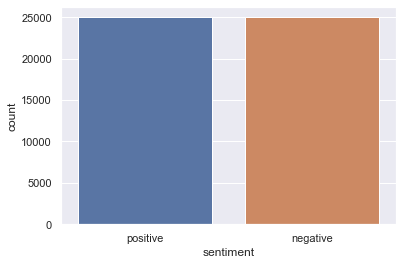

In [8]:
sns.countplot(x='sentiment', data=documents)

In [7]:
import string
import spacy
from wordcloud import WordCloud
import re

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import bs4
from collections import Counter


def tokenize(documents):
    nlp = spacy.load("en_core_web_sm")
    return [token for token in nlp.pipe(documents.tolist(), n_process=5)]


def remove_stop_words(documents):
    stop_words = [token for doc in documents for token in doc if token.is_stop]
    filtered = documents.apply(lambda tokens: [token for token in tokens if not token.is_stop])

    return filtered, stop_words
    
def normalize(documents):
    return documents
    
def stem_words(text):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])

def lemmatize(documents):
    documents.apply(lambda tokens: [token.lemma_ for token in tokens])

PUNCT_TO_REMOVE = string.punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)


def plot_wordcloud(cnt):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white")
    wordcloud.generate_from_frequencies(dict(cnt))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


def top50(words):
    cnt = Counter()
    for token in words:
        cnt[token] += 1
        
    return cnt.most_common(50)

In [8]:
lowercased = documents['review'].str.lower()
no_html = lowercased.apply(remove_html)
no_punctuation = no_html.apply(remove_punctuation)

In [12]:
no_punctuation.iloc[1]

'a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done'

In [9]:
tokenized = tokenize(no_punctuation)

In [11]:
tokenized = pd.Series(tokenized)

In [12]:
filtered_tokenized, stop_words = remove_stop_words(tokenized)

In [13]:
lemmatized = lemmatize(filtered_tokens)

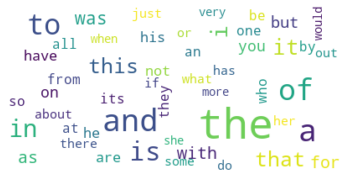

In [16]:
cnt = top50(stop_words)
plot_wordcloud(cnt)

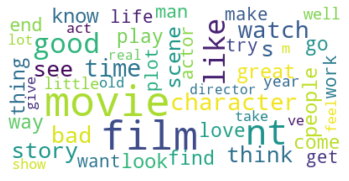

In [19]:
tokens = [word for tks in lemmatized for word in tks]

count = top50(tokens)
plot_wordcloud(count)

In [23]:
stemmas = lemmatized.apply(lambda tokens: [stem_words(token) for token in tokens])

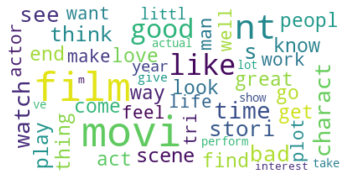

In [24]:
count = top50([word for tks in stemmas for word in tks])
plot_wordcloud(count)

In [72]:
filtered_tokenized.head()

review sentiment  \
0  one of the other reviewers has mentioned that ...  positive   
1  a wonderful little production the filming tech...  positive   
2  i thought this was a wonderful way to spend ti...  positive   
3  basically theres a family where a little boy j...  negative   
4  petter matteis love in the time of money is a ...  positive   

                                              tokens  \
0  [one, of, the, other, reviewers, has, mentione...   
1  [a, wonderful, little, production, the, filmin...   
2  [i, thought, this, was, a, wonderful, way, to,...   
3  [basically, there, s, a, family, where, a, lit...   
4  [petter, matteis, love, in, the, time, of, mon...   

                                     filtered_tokens  
0  [reviewers, mentioned, watching, 1, oz, episod...  
1  [wonderful, little, production, filming, techn...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, s, family, little, boy, jake, thin...  
4  [petter, matteis, love, time, money, visually,...

In [101]:
filtered_tokenized.iloc[49995]

[i,
 thought,
 this,
 movie,
 did,
 a,
 down,
 right,
 good,
 job,
 it,
 was,
 nt,
 as,
 creative,
 or,
 original,
 as,
 the,
 first,
 but,
 who,
 was,
 expecting,
 it,
 to,
 be,
 it,
 was,
 a,
 whole,
 lotta,
 fun,
 the,
 more,
 i,
 think,
 about,
 it,
 the,
 more,
 i,
 like,
 it,
 and,
 when,
 it,
 comes,
 out,
 on,
 dvd,
 i,
 m,
 going,
 to,
 pay,
 the,
 money,
 for,
 it,
 very,
 proudly,
 every,
 last,
 cent,
 sharon,
 stone,
 is,
 great,
 she,
 always,
 is,
 even,
 if,
 her,
 movie,
 is,
 horriblecatwoman,
 but,
 this,
 movie,
 is,
 nt,
 this,
 is,
 one,
 of,
 those,
 movies,
 that,
 will,
 be,
 underrated,
 for,
 its,
 lifetime,
 and,
 it,
 will,
 probably,
 become,
 a,
 classic,
 in,
 like,
 20,
 yrs,
 do,
 nt,
 wait,
 for,
 it,
 to,
 be,
 a,
 classic,
 watch,
 it,
 now,
 and,
 enjoy,
 it,
 do,
 nt,
 expect,
 a,
 masterpiece,
 or,
 something,
 that,
 s,
 gripping,
 and,
 soul,
 touching,
 just,
 allow,
 yourself,
 to,
 get,
 out,
 of,
 your,
 life,
 and,
 get,
 yourself,
 involv

In [92]:
tokenized

0        [one, of, the, other, reviewers, has, mentione...
1        [a, wonderful, little, production, the, filmin...
2        [i, thought, this, was, a, wonderful, way, to,...
3        [basically, there, s, a, family, where, a, lit...
4        [petter, matteis, love, in, the, time, of, mon...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [i, m, going, to, have, to, disagree, with, th...
49999    [no, one, expects, the, star, trek, movies, to...
Name: review, Length: 50000, dtype: object

In [27]:
documents['lemmas'] = lemmatized

In [28]:
documents['stemmas'] = stemmas

In [29]:
documents.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                              lemmas  \
0  [reviewer, mention, watch, 1, oz, episode, ll,...   
1  [wonderful, little, production, filming, techn...   
2  [think, wonderful, way, spend, time, hot, summ...   
3  [basically, s, family, little, boy, jake, thin...   
4  [petter, matteis, love, time, money, visually,...   

                                             stemmas  
0  [review, mention, watch, 1, oz, episod, ll, ho...  
1  [wonder, littl, product, film, techniqu, unass...  
2  [think, wonder, way, spend, time, hot, summer,...  
3  [basic, s, famili, littl, boy, jake, think, s,...  
4  [petter, mattei, love, time, money, visual, st...

In [31]:
documents.to_csv('../data/preprocessed.csv', index=None)